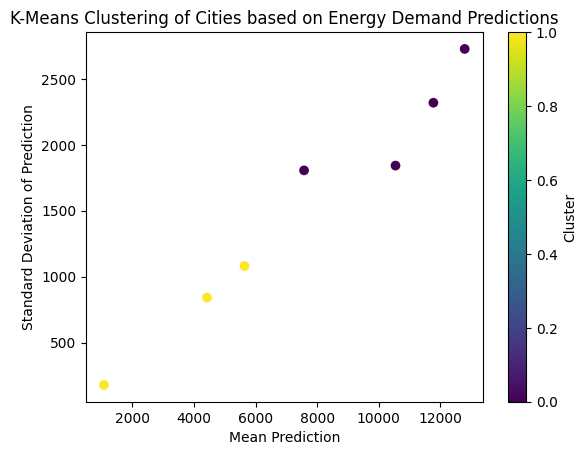

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

file_path = 'Energy Demand Predictions.xlsx'
df = pd.read_excel(file_path)
df_transposed = df.set_index('Time').transpose()

features = df_transposed.apply([np.mean, np.std], axis=1).rename(columns={'mean': 'mean_prediction', 'std': 'std_prediction'})

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
df_transposed['cluster'] = kmeans.labels_

plt.scatter(features['mean_prediction'], features['std_prediction'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Mean Prediction')
plt.ylabel('Standard Deviation of Prediction')
plt.title('K-Means Clustering of Cities based on Energy Demand Predictions')
plt.colorbar(label='Cluster')
plt.show()
